## K-Nearest-Neighbour Implementation w/ sklearn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=5)

df = pd.read_csv('..\data\listings.csv')


In [25]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

In [26]:
df.shape

(24422, 106)

In [27]:
url_cols = [c for c in df.columns if c.endswith("url")]
df.drop(['id', 'listing_url', 'scrape_id'] + url_cols, axis=1).drop_duplicates().shape

(24422, 96)

In [28]:
for i in df.columns:
    print(i)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

In [29]:
df.cancellation_policy.value_counts(dropna=False)

flexible                       9623
strict_14_with_grace_period    7334
moderate                       7323
super_strict_60                  77
super_strict_30                  62
strict                            2
NaN                               1
Name: cancellation_policy, dtype: int64

In [30]:
# reduce df to 4 columns: bed, bedrooms, room-type, price

short_df = df[['review_scores_rating', 'neighbourhood_group_cleansed', 'neighbourhood_cleansed', 'beds', 'bedrooms', 'room_type', 'cancellation_policy', 'price']]

In [31]:
# transform room_type to boolean values

def remove_currency(prices_with_currency):
    price = float(prices_with_currency.replace(',', '').replace('$', ''))
    return price

df['price'] = df['price'].map(remove_currency)

AttributeError: 'float' object has no attribute 'replace'

In [38]:
df[(df.price>500) & (df.price<1000)][["name", "room_type", "price","beds", "bedrooms", "monthly_price", "security_deposit", "cleaning_fee", "minimum_nights"]]

,name,room_type,price,beds,bedrooms,monthly_price,security_deposit,cleaning_fee,minimum_nights
73,STORAGE APARTMENT URBAN,Entire home/apt,506.0,10.0,5.0,"$9,600.00",$400.00,$120.00,3
785,LOFT- 8 minutes from train station!,Entire home/apt,750.0,1.0,1.0,NaN,NaN,NaN,1
1905,Outstanding luxury...,Entire home/apt,580.0,3.0,3.0,"$13,900.00",$0.00,$150.00,3
2046,Apartment in the Center of Berlin,Entire home/apt,944.0,1.0,1.0,$690.00,$0.00,$0.00,3
2315,600 qm Loft auf Insel in Berlin,Entire home/apt,650.0,3.0,4.0,NaN,NaN,NaN,2
2910,Luxury loft: private or business trip/photoshoots,Entire home/apt,550.0,3.0,3.0,NaN,$580.00,NaN,3
3620,2 Room Appartment in Berlin,Entire home/apt,800.0,2.0,2.0,NaN,NaN,NaN,1
3798,Large Penthouse in Charlottenburg,Entire home/apt,600.0,3.0,2.0,NaN,$150.00,NaN,1
5040,180 sqm Luxury Penthouse w/ Rooftop,Entire home/apt,595.0,4.0,3.0,"$4,600.00","$1,800.00",$120.00,5
6468,28 BED ROOM / 8 RO. APARTMENT/ HOSTEL,Private room,899.0,16.0,8.0,NaN,$200.00,$80.00,1


In [12]:
import pandas_profiling
short_df.profile_report(style={'full_width': True})

In [47]:
short_df.dropna(inplace=True)

entire_apt_df = short_df[short_df.room_type == 'Entire home/apt']
private_room_df = short_df[short_df.room_type == 'Private room']

In [7]:
def outlier(df, column):
    df[column] = df[column]._get_numeric_data()
    q1 = df[column].quantile(0.25)
    print(q1)
    q3 = df[column].quantile(0.75)
    print(q3)
    iqr = q3 - q1

    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)

    df = df.drop(df[df[column] < lower_bound].index)
    df = df.drop(df[df[column] > upper_bound].index)
            
    
    return(df)

In [8]:
short_df = short_df.dropna()
short_df = outlier(short_df, 'price')
len(short_df.index)

33.0
75.0


22716

#### Encode 'room-type' with LabelEncoder and OneHotEncoder

In [9]:
save_df = short_df
short_df = pd.get_dummies(data=short_df, columns=['room_type'], drop_first=True)
short_df = pd.get_dummies(data=short_df, columns=['cancellation_policy'], drop_first=True)
short_df

,price,beds,bedrooms,room_type_Hotel room,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,21.0,1.0,1.0,0,1,0,1,0,0,0,0
1,60.0,2.0,1.0,0,0,0,1,0,0,0,0
2,90.0,2.0,1.0,0,0,0,0,0,1,0,0
3,28.0,1.0,1.0,0,1,0,0,0,1,0,0
4,125.0,1.0,1.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
24417,54.0,1.0,1.0,0,1,0,0,0,0,0,0
24418,60.0,0.0,0.0,0,0,0,0,0,0,0,0
24419,36.0,1.0,0.0,0,1,0,0,0,0,0,0
24420,50.0,2.0,1.0,0,1,0,0,0,0,0,0


In [10]:
X = short_df.drop(columns=['price'])
y = short_df['price'].values


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
knnr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [13]:
knnr.score(X_test, y_test)

0.17949200623226091

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
y_pred = knnr.predict(X_test)
print(mean_absolute_error(y_pred, y_test))
print(mean_squared_error(y_pred, y_test))

19.113031879418436
590.1609177004135


# Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [16]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.3613779379486727

In [17]:
y_lr_pred = lr.predict(X_test)

In [18]:
print(mean_absolute_error(y_lr_pred, y_test))
print(mean_squared_error(y_lr_pred, y_test))

16.363592159392105
459.3371241555849


In [59]:
coef_df = pd.DataFrame(lr.coef_, short_df.columns[1:])
print(coef_df)

                                                         0
beds                                              2.881896
bedrooms                                          7.510751
room_type_Hotel room                              4.141901
room_type_Private room                          -25.849263
room_type_Shared room                           -39.486815
cancellation_policy_moderate                      4.295742
cancellation_policy_strict                       40.401839
cancellation_policy_strict_14_with_grace_period   6.403911
cancellation_policy_super_strict_30             -37.713797
cancellation_policy_super_strict_60              17.307484


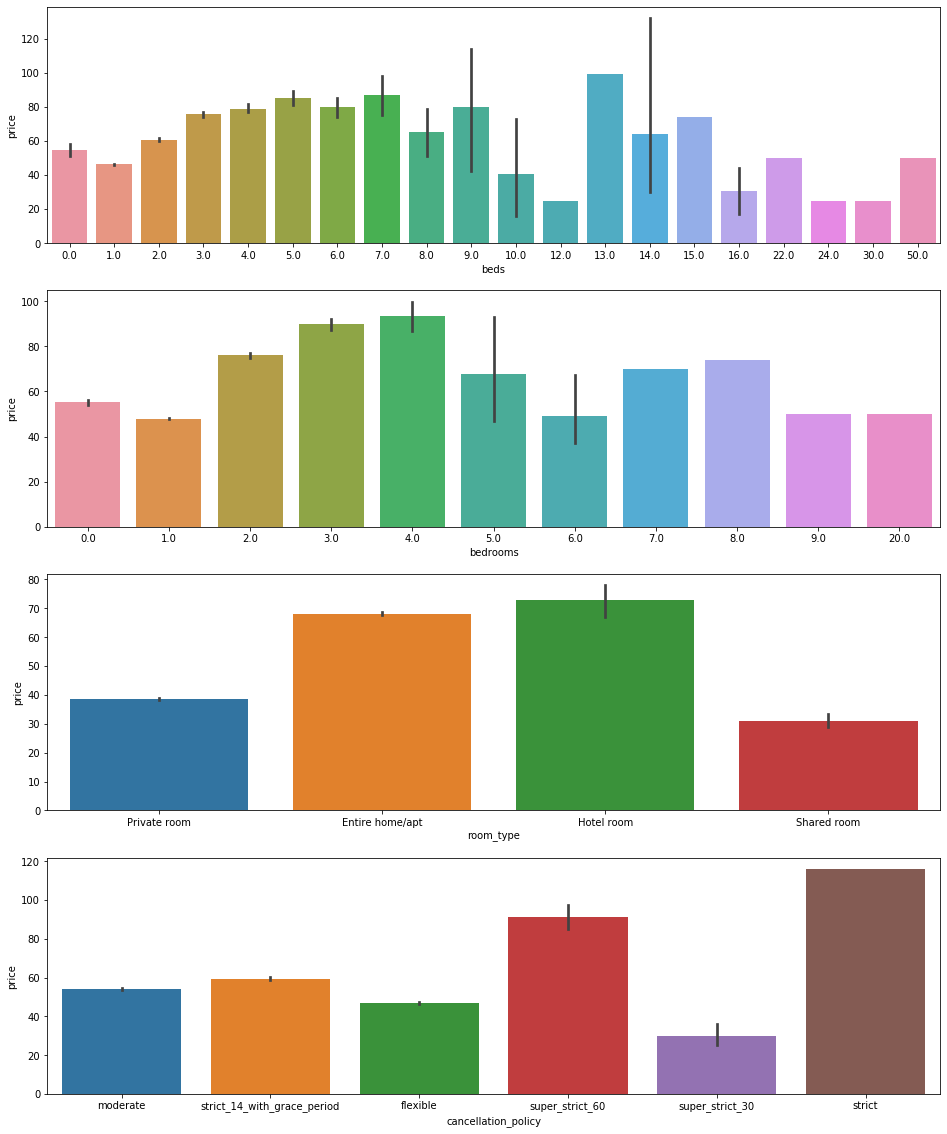

In [147]:
feature_len = len(save_df.columns)
fig, axes = plt.subplots(figsize=(16,20), nrows=feature_len-1)
feature_len
for i, col in enumerate(save_df.columns[1:]):
        sns.barplot(x=save_df[col], y='price', data=save_df, ax=axes[i]);

#print(sns.boxplot(x="room_type", y="price", data=save_df, ax=axes[0]));
#print(sns.boxplot(x='cancellation_policy', y='price', data=save_df, ax=axes[1]));

<Figure size 432x288 with 0 Axes>

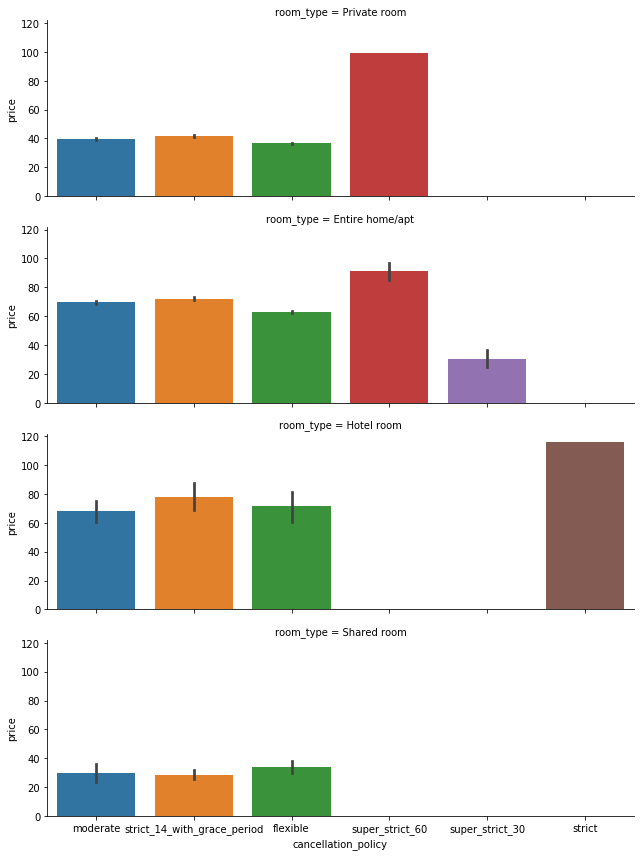

In [121]:
plt.tight_layout()
sns.catplot(x='cancellation_policy', y='price', col='room_type', col_wrap=1, data=save_df, kind="bar", height=3, aspect=3);